# Исследовательский анализ заведений общественного питания Москвы

- Автор: Андриив Ирина
- Дата: 26.05.2025

### Цели и задачи проекта

<font color='#777778'>***Цель проекта:*** провести исследовательский анализ заведений общественного питания Москвы с целью определения наиболее подходящего инвесторам места.  
***Задачи:***  
1.Загрузить данные и познакомиться с их содержимым.  
2.Провести предобработку данных.  
3.Провести исследовательский анализ данных.   
4.Сформулировать выводы по проведённому анализу.  </font>

### Описание данных

<font color='#777778'> В качестве исходных данных представлены 2 датасета: первый содержит информацию о заведениях общественного питания, второй содержит информацию о среднем чеке в заведениях общественного питания.

### Содержимое проекта

<font color='#777778'>1. Загрузка данных и знакомство с ними  
2. Предобработка данных  
3. Исследовательский анализ данных  
4. Итоговый вывод и рекомендации  </font>

---

## 1. Загрузка данных и знакомство с ними

In [1]:
# Установим библиотеку phik
!pip install phik

In [2]:
# Вызывем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik

In [3]:
# Загрузим первый датасет rest_info
rest_info = pd.read_csv(...)

In [4]:
# Загрузим второй датасет rest_price
rest_price = pd.read_csv(...)

- Познакомьтесь с данными и изучите общую информацию о них.

In [5]:
#Выведем первые 5 строк и инфо о датасете rest_info
display(rest_info.head())
display(rest_info.info())

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


None

In [6]:
# Выведем первые 5 строк и инфо о датасете rest_price
display(rest_price.head())
display(rest_price.info())

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


None

---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

Согласно полученной информации, датасет rest_info включает 8406 строк и 9 столбцов. В столбцах hours и seats присутствуют пропущенные данные.  
Датасет rest_price включает 4058 строк и 5 столбцов. Датасет содержит пропуски в каждом столбце, кроме столбца id. Тип данных столбца price в датасете - object, должен быть заменен на тип данных category.

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [7]:
# Объединяем два датасета в один:
df = rest_info.merge(rest_price, on='id', how='left')

In [8]:
# Выведем инфо об объединенном датасете
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


None

In [9]:
# Сохраним изначальное количество строк в датасете
df_rows = df.shape[0]

In [10]:
# Сохраним изначальное количество столбцов в датасете
df_columns = df.shape[1]

## 2. Предобработка данных


Анализ датасета показал, что тип данных столбца price в датасете - object, должен быть заменен на тип данных category

In [12]:
# Преобразуем тип данных столбца price
df['price'] = df['price'].astype('category')

In [13]:
# Проверим обновленный тип данных
df['price'].dtypes

CategoricalDtype(categories=['высокие', 'выше среднего', 'низкие', 'средние'], ordered=False)

In [14]:
# Выведем количество пропущенных значений в датафрейме в абсолютном выражении
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [15]:
# Выведем количество пропущенных значений в датафрейме в относительном выражении
df.isna().mean() *100

id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
hours                 6.376398
rating                0.000000
chain                 0.000000
seats                42.957411
price                60.563883
avg_bill             54.603854
middle_avg_bill      62.538663
middle_coffee_cup    93.635498
dtype: float64

Согласно полученным результатам, пропущенные значения содержатся в столбцах hours, seats, price, avg_bill, middle_avg_bill, middle_coffee_cup. Пропущенные значения в столбцах невозможно получить путем расчета, также удалять строки с пропущенными значениями нецелесообразно, так как они составляют высокий процент от общего количества строк. Предлагается оставить строки с пропущенными значениями без изменений и не учитывать их в дальнейших расчетах. Для столбцов с категориальными данными (hours, avg_bill) пропущенные значения предлагается заменить на категории-индикаторы для подсчета доли пропущенных значений 

In [17]:
# Заменим пропуски на категории-индикаторы
df['hours'] = df['hours'].fillna('нет данных')

In [18]:
# Заменим пропуски на категории-индикаторы
df['avg_bill'] = df['avg_bill'].fillna('нет данных')

In [19]:
# Проверим датасет на явные дубликаты 
display(df[df.duplicated()])

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup


Явных дубликатов не обнаружено

In [20]:
# Приведем строковые данные в столбце name к единому виду
df['name'] = df['name'].str.lower()
df['name'] = df['name'].str.replace(' ', '_')

In [21]:
# Приведем строковые данные в столбце address к единому виду
df['address'] = df['address'].str.lower()
df['address'] = df['address'].str.replace(' ', '_')

In [22]:
# Проверим наличие дубликатов в столбцах, выведем эти дубликаты
dupl = df[df.duplicated(subset = ['name', 'address'], keep = False)]
display(dupl)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва,_парк_ангарские_пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,NaN,нет данных,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва,_парк_ангарские_пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,NaN,нет данных,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,more_poke,ресторан,"москва,_волоколамское_шоссе,_11,_стр._2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,нет данных,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more_poke,ресторан,"москва,_волоколамское_шоссе,_11,_стр._2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,нет данных,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня_клешни_и_хвосты,ресторан,"москва,_проспект_мира,_118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,нет данных,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня_клешни_и_хвосты,"бар,паб","москва,_проспект_мира,_118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,нет данных,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб_да_выпечка,булочная,"москва,_ярцевская_улица,_19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,нет данных,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб_да_выпечка,кафе,"москва,_ярцевская_улица,_19",Западный административный округ,нет данных,4.1,0,276.0,NaN,нет данных,NaN,NaN


In [23]:
# Удалим найденные дубликаты, создадим новый датафрейм без дубликатов
new_df = df.drop_duplicates(subset = ['name', 'address'], inplace = False).copy()

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [24]:
# Создадим столбец для определения заведений, работающих круглосуточно и ежедневно
new_df['is_24_7'] = (new_df['hours'].str.contains('круглосуточно', case=False, na=False))&(new_df['hours'].str.contains('ежедневно', case=False, na=False))
display(new_df.head())

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва,_улица_дыбенко,_7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,нет данных,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре_комнаты,ресторан,"москва,_улица_дыбенко,_36,_корп._1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва,_клязьминская_улица,_15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse_coffee_shop,кофейня,"москва,_улица_маршала_федоренко,_12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль_марко,пиццерия,"москва,_правобережная_улица,_1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False


---

### Промежуточный вывод


В ходе предобработки датасетов rest_info, rest_price:  
1. Были проанализированы объемы датасетов   
2. Датасеты были объединены в один для удобства дальнейшей обработки  
3. В столбце price был изменен тип данных  
4. В столбцах hours, price, avg_bill пропуски были заменены на категории-индикаторы  
5. Были обнаружены и удалены из датасета неявные дубли  
6. Был добавлен новый столбец is_24_7, позволяющий выделить заведения, работающие круглосуточно и ежедневно

In [27]:
print(f'Количество строк в изначальном датасете: {df_rows}')
print(f'Количество строк в датасете после предобработки: {new_df.shape[0]}')
print(f'Количество удаленных строк составило {df_rows - new_df.shape[0]} в абсолютном выражении, {round((df_rows - new_df.shape[0])/df_rows, 4)}% в относительном выражении')
print(f'Количество столбцов до предобработки: {df_columns}')
print(f'Количество столбцов после предобработки: {new_df.shape[1]}')

Количество строк в изначальном датасете: 8406
Количество строк в датасете после предобработки: 8402
Количество удаленных строк составило 4 в абсолютном выражении, 0.0005% в относительном выражении
Количество столбцов до предобработки: 13
Количество столбцов после предобработки: 14


## 3. Исследовательский анализ данных


---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [28]:
# Основные категории заведений в датасете
category_grouped = new_df.groupby('category')['id'].count().sort_values()
display(category_grouped)

category
булочная            256
столовая            315
быстрое питание     603
пиццерия            633
бар,паб             764
кофейня            1413
ресторан           2042
кафе               2376
Name: id, dtype: int64

In [29]:
# Проверим распределение заведений в относительных значениях
category_proportion = new_df['category'].value_counts(normalize=True).sort_values()
display(category_proportion)

булочная           0.030469
столовая           0.037491
быстрое питание    0.071769
пиццерия           0.075339
бар,паб            0.090931
кофейня            0.168174
ресторан           0.243037
кафе               0.282790
Name: category, dtype: float64

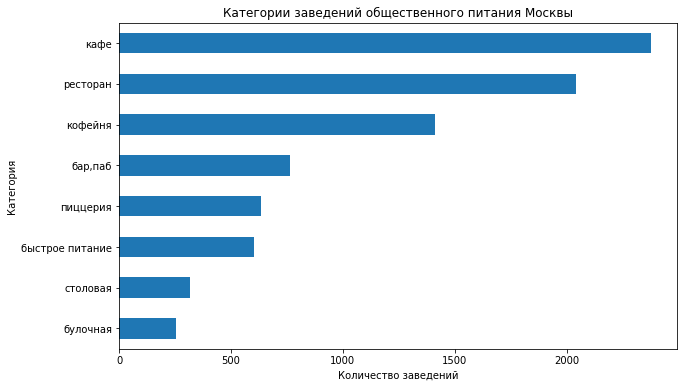

In [30]:
# Визуализируем полученные данные
category_grouped.plot(kind='barh', figsize=(10, 6))
plt.ylabel('Категория')
plt.xlabel('Количество заведений')
plt.title('Категории заведений общественного питания Москвы');

В датасете представлены следующие категории данных: булочная, столовая, быстрое питание, пиццерия, бар,паб, кофейня, ресторан, кафе. Наиболее представленными категориями являются ***кафе*** *(2377)*, ***ресторан*** *(2042)*, ***кофейня*** *(1413)*; наименее представленными - ***столовая*** *(315)*, ***булочная*** *(256)*

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [31]:
# Выведем административные районы Москвы
district_grouped = new_df.groupby('district')['id'].count().sort_values()
display(district_grouped)

district
Северо-Западный административный округ      409
Юго-Западный административный округ         709
Юго-Восточный административный округ        714
Восточный административный округ            798
Западный административный округ             850
Северо-Восточный административный округ     890
Южный административный округ                892
Северный административный округ             898
Центральный административный округ         2242
Name: id, dtype: int64

In [32]:
# Проверим распределение заведений в относительных значениях
district_proportion = new_df['district'].value_counts(normalize=True).sort_values()
display(district_proportion)

Северо-Западный административный округ     0.048679
Юго-Западный административный округ        0.084385
Юго-Восточный административный округ       0.084980
Восточный административный округ           0.094977
Западный административный округ            0.101166
Северо-Восточный административный округ    0.105927
Южный административный округ               0.106165
Северный административный округ            0.106879
Центральный административный округ         0.266841
Name: district, dtype: float64

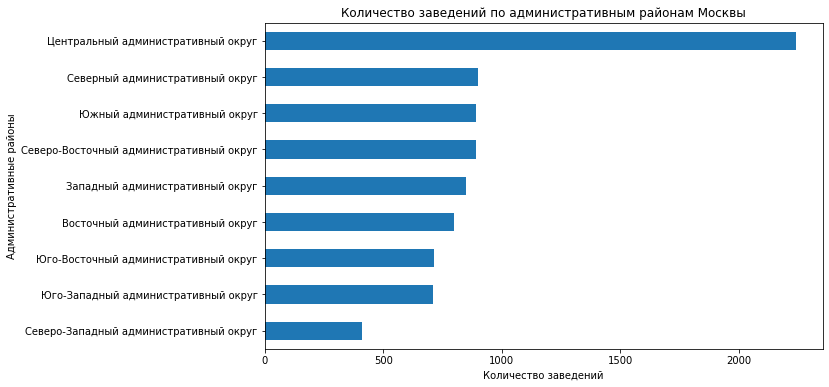

In [33]:
# Визуализируем полученные данные
district_grouped.plot(kind='barh', figsize=(10, 6))
plt.ylabel('Административные районы')
plt.xlabel('Количество заведений')
plt.title('Количество заведений по административным районам Москвы');

Согласно полученным данным, наибольшее количество заведений приходится на Центральный административный округ - 2242 заведения, что примерно в 2,5 раза больше количества заведений в следующем по порядку административном округе - Северном административном округе.  
Лидерами по количеству заведений являются ***Центральный*** *(2242 заведения)*, ***Северный*** *(899 заведений)* и ***Южный*** *(892 заведения)* ***административные округа***. Наименьшее количество заведений представлено в ***Юго-Восточном*** *(714 заведений)*, ***Юго-западном*** *(709 заведений)* и ***Северо-Западном*** *(409 заведений)* ***административных округах***.

In [34]:
# Отфильтруем данные для Центрального административного округа
central_administrative_district = new_df[(new_df['district']=='Центральный административный округ')]
# Проверим распределение заведений по категориям для Центрального дминистративного округа
category_cad = central_administrative_district.groupby('category')['id'].count().sort_values()
display(category_cad)

category
булочная            50
столовая            66
быстрое питание     87
пиццерия           113
бар,паб            364
кофейня            428
кафе               464
ресторан           670
Name: id, dtype: int64

In [35]:
# Проверим распределение заведений в относительных значениях
cad_proportion = central_administrative_district['category'].value_counts(normalize=True).sort_values()
display(cad_proportion)

булочная           0.022302
столовая           0.029438
быстрое питание    0.038805
пиццерия           0.050401
бар,паб            0.162355
кофейня            0.190901
кафе               0.206958
ресторан           0.298840
Name: category, dtype: float64

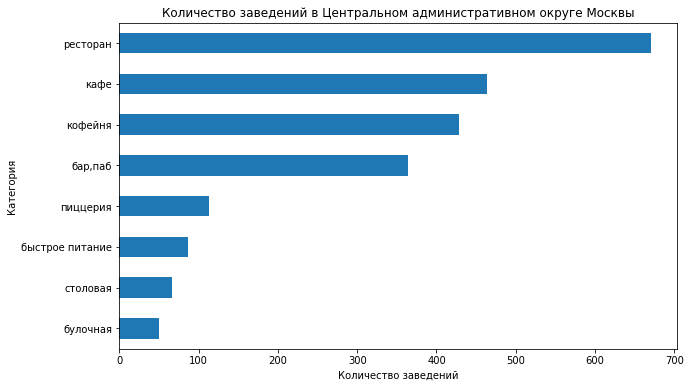

In [36]:
# Визуализируем полученные данные 
category_cad.plot(kind='barh', figsize=(10, 6))
plt.ylabel('Категория')
plt.xlabel('Количество заведений')
plt.title('Количество заведений в Центральном административном округе Москвы');

Распределение заведений по категориям в Центральном административном округе в целом соответствует распределению по всем округам: наиболее популярными категориями заведений в Центральном административном округе являются ***рестораны*** *(670)*, ***кафе*** *(464)* и ***кофейни*** *(428)*. Однако важно отметить отличие от распределения по всем округам: в Центральном административном округе в наибольшем количестве представлены заведения категории ресторан, в то время как для всех округов наибольшее количество заведений представлено в категории кафе. Это связано с тем, что в Центральном административном округе представлены заведения наиболее высокого ценового сегмента. Наименее популярными также являются заведения категорий ***столовая*** *(66)*, ***булочная*** *(50)*

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [37]:
# Проверим распределение заведений по типу сетевое/несетевое
chain_grouped = new_df.groupby('chain')['id'].count().sort_values()
display(chain_grouped)

chain
1    3203
0    5199
Name: id, dtype: int64

In [39]:
# Проверим распределение заведений в относительных значениях
chain_proportion = round(new_df['chain'].value_counts(normalize=True).sort_values(), 2)
display(chain_proportion)

1    0.38
0    0.62
Name: chain, dtype: float64

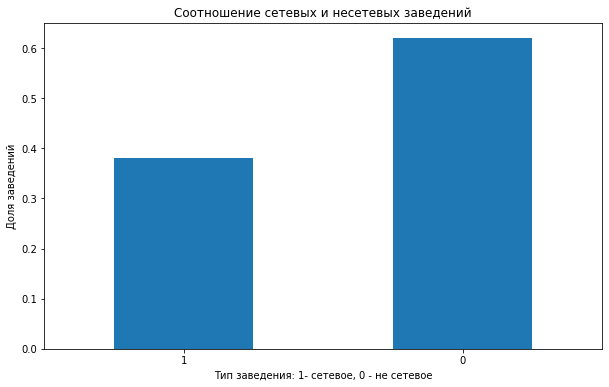

In [40]:
# Построим график распределения сетевых и несетевых заведений в относительных значениях
ax = chain_proportion.plot(kind = 'bar', figsize=(10, 6))
plt.xlabel('Тип заведения: 1- сетевое, 0 - не сетевое')
plt.ylabel('Доля заведений')
plt.title('Соотношение сетевых и несетевых заведений')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);

Согласно полученным данным, несетевых заведений представлено практически в 2 раза больше, чем сетевых (5200 несетевых, 3203 сетевых, что составляет 62% и 38% соответственно).

In [41]:
# Построим сводную таблицу для расчета распределения заведений по категориям
pivot_category = pd.pivot_table(new_df,
              index = 'category',
              columns = 'chain',
              values = 'id',
              aggfunc = 'count')
# Выведем сводную таблицу
display(pivot_category)

chain,0,1
category,,
"бар,паб",596,168
булочная,99,157
быстрое питание,371,232
кафе,1597,779
кофейня,693,720
пиццерия,303,330
ресторан,1313,729
столовая,227,88


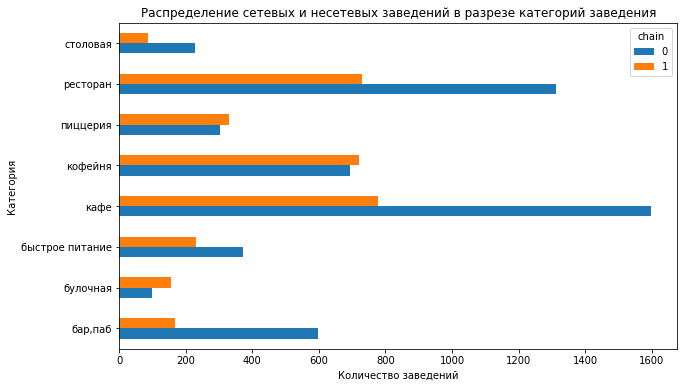

In [42]:
# Построим график распределения сетевых и несетевых заведений в разрезе категорий заведения
pivot_category.plot(kind = 'barh', figsize=(10, 6))
plt.ylabel('Категория')
plt.xlabel('Количество заведений')
plt.title('Распределение сетевых и несетевых заведений в разрезе категорий заведения');

In [43]:
# Добавим информацию о процентном соотношении показателей относительно общего количества
pivot_category['total'] = pivot_category[0] + pivot_category[1]
pivot_category['percent_0'] = round(pivot_category[0]/pivot_category['total']*100, 0)
pivot_category['percent_1'] = round(pivot_category[1]/pivot_category['total']*100, 0)
# Выведем сводную таблицу
display(pivot_category)

chain,0,1,total,percent_0,percent_1
category,,,,,
"бар,паб",596,168,764,78.0,22.0
булочная,99,157,256,39.0,61.0
быстрое питание,371,232,603,62.0,38.0
кафе,1597,779,2376,67.0,33.0
кофейня,693,720,1413,49.0,51.0
пиццерия,303,330,633,48.0,52.0
ресторан,1313,729,2042,64.0,36.0
столовая,227,88,315,72.0,28.0


Анализ распределения сетевых и несетевых заведений в разрезе категорий позволяет выделить категории заведений, для которых наиболее характерны сети заведений: ***кофейня, пиццерия, булочная***. Важно отметить, что разница в количестве сетевых и несетевых заведений по данным категориям небольшая и составляет от 3% до 22%. Среди несетевых заведений в большинстве представлены ***столовые, рестораны, кафе, заведения быстрого питания, бары,пабы***. Для данных категорий характерно значительное преобладание несетевых заведений: количество несетевых заведений превосходит количество сетевых на 24%-56%.

In [44]:
# Построим сводную таблицу для расчета распределения заведений по административным округам
chain_pivot = pd.pivot_table(new_df,
                            index = 'district',
                            columns = 'chain',
                            values = 'id',
                            aggfunc = 'count')
display(chain_pivot)

chain,0,1
district,,
Восточный административный округ,515,283
Западный административный округ,474,376
Северный административный округ,552,346
Северо-Восточный административный округ,557,333
Северо-Западный административный округ,253,156
Центральный административный округ,1367,875
Юго-Восточный административный округ,494,220
Юго-Западный административный округ,407,302
Южный административный округ,580,312


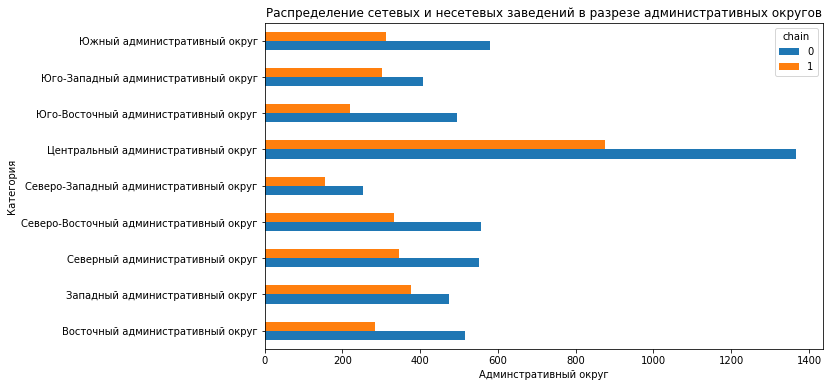

In [45]:
# Построим график распределения сетевых и несетевых заведений в разрезе административных округов
chain_pivot.plot(kind = 'barh', figsize=(10, 6))
plt.ylabel('Категория')
plt.xlabel('Админстративный округ')
plt.title('Распределение сетевых и несетевых заведений в разрезе административных округов');

In [46]:
# Добавим информацию о процентном соотношении показателей относительно общего количества
chain_pivot['total'] = chain_pivot[0] + chain_pivot[1]
chain_pivot['percent_0'] = round(chain_pivot[0]/chain_pivot['total']*100, 0)
chain_pivot['percent_1'] = round(chain_pivot[1]/chain_pivot['total']*100, 0)
# Выведем сводную таблицу
display(chain_pivot)

chain,0,1,total,percent_0,percent_1
district,,,,,
Восточный административный округ,515,283,798,65.0,35.0
Западный административный округ,474,376,850,56.0,44.0
Северный административный округ,552,346,898,61.0,39.0
Северо-Восточный административный округ,557,333,890,63.0,37.0
Северо-Западный административный округ,253,156,409,62.0,38.0
Центральный административный округ,1367,875,2242,61.0,39.0
Юго-Восточный административный округ,494,220,714,69.0,31.0
Юго-Западный административный округ,407,302,709,57.0,43.0
Южный административный округ,580,312,892,65.0,35.0


Согласно полученным данным, для всех административных округов сохраняется единая тенденция: количество сетевых заведений в округе превышает количество несетевых. При этом максимальное количество сетевых и несетевых заведений отмечается в Центральном административном округе (875 и 1367 соответственно), тогда как наибольшая концентрация сетевых заведений относительно несетевых наблюдается в Западном, Юго-Западном административных округах. Наибольшая концентрация несетевых заведений относительно сетевых наблюдается в Юго-Восточном, Южном, Восточном административных округах.

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [47]:
# Выведем описательную статистику для столбца seats 
new_df['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Всего в датасете представлена информация о посадочных местах для 4792 заведений. Минимальное количество посадочных мест равно 0. Данное значение может не являться выбросом и быть реальным для заведений без посадочных мест (кофейня, булочная). Максимальное значение посадочных мест равно 1288, что может являться выбросом, а может являться реальным значением (например, для фудкортов). Далее предлагается построить диаграммы распределения значаний для определения выбросов.  
Среднее количество мест примерно равно 108, медианное значение равно 75, что говорит о неравномерном распределении данных с перекосом значений в правую сторону ("правый хвост").   

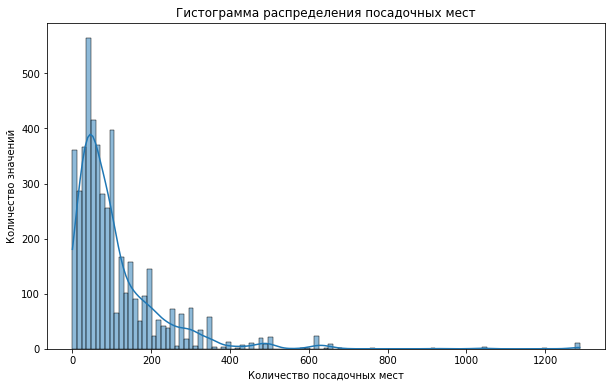

In [48]:
# Построим гистограмму
plt.figure(figsize=(10, 6))
sns.histplot(data=new_df, x='seats', kde=True)
plt.ylabel('Количество значений')
plt.xlabel('Количество посадочных мест')
plt.title('Гистограмма распределения посадочных мест');

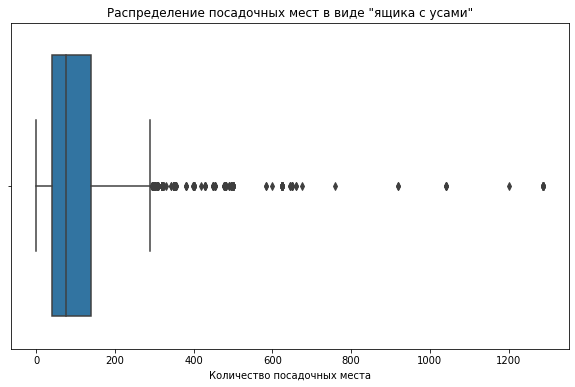

In [49]:
# Построим "ящик с усами"
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_df, x='seats')
plt.xlabel('Количество посадочных места')
plt.title('Распределение посадочных мест в виде "ящика с усами"');

Согласно диаграмме "ящик с усами", выбросами следует считать все значения после 300 (после правого "уса"). Однако, согласно гистрограмме выше, некоторые значения после 300 еще неоднократно встречаются в данных, что может говорить о реальности данных. В связи с этим, согласно полученным графикам, с одной стороны, возможно преположить, что значения до 500 могут являться реальными значениями, отражающими количество посадочных мест. Значения после 500 представлены в единичных количествах, что может говорить о том, что данные значения являются выбросами. С другой стороны, данные с большим количеством посадочных мест могут относиться к фуд-кортам в крупных ТЦ, в связи с этим могут не являться выбросами.

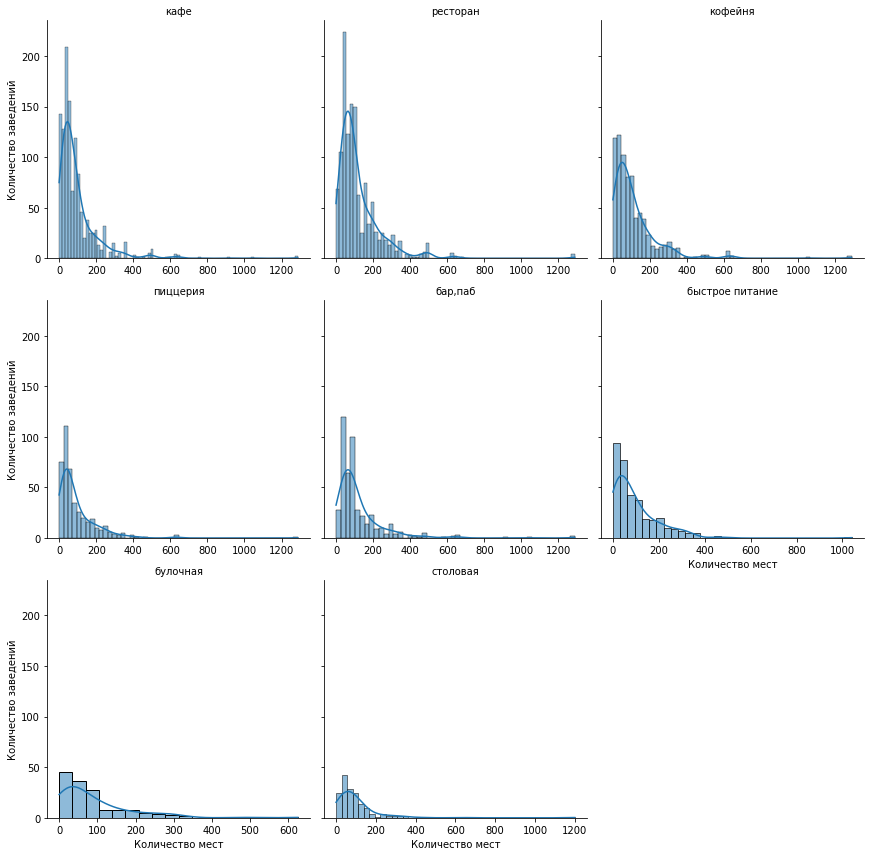

In [50]:
# Визуализируем распределение данных о посадочных местах заведения в зависимости от категории заведения
# Создадим сетку графиков
seats_facetgrid = sns.FacetGrid(
    data = new_df,
    col ='category',
    col_wrap=3,
    height=4,
    sharex=False
)
# Добавим инфо для графиков в сетки
seats_facetgrid.map(sns.histplot, 'seats', kde=True)

# Добавим заголовки графиков
seats_facetgrid.set_titles("{col_name}")
seats_facetgrid.set_axis_labels("Количество мест", "Количество заведений")
plt.show()

Гистограммы распределения данных демонстрируют неравномерное распределение данных по категориям, имеется перекос вправо, крание правые значения по оси x представлены в единичном количестве.  
Чтобы минимизировать влияние возмонжых выбросов, в дальнейших расчетах используем расчет медианы.

In [51]:
# Выведем наиболее типичное (медианное) количество посадочных мест для каждой категории
median_seats = pd.pivot_table(new_df, 
                           index = 'category',
                           values = 'seats',
                           aggfunc = 'median')
display(round(median_seats['seats'], 0))

category
бар,паб            82.0
булочная           50.0
быстрое питание    65.0
кафе               60.0
кофейня            80.0
пиццерия           55.0
ресторан           86.0
столовая           76.0
Name: seats, dtype: float64

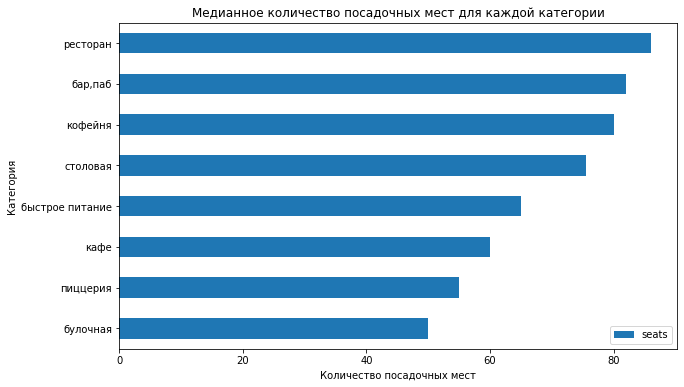

In [52]:
# Визуализируем данные 
median_seats.sort_values(by = 'seats').plot(kind = 'barh', figsize=(10, 6))
plt.ylabel('Категория')
plt.xlabel('Количество посадочных мест')
plt.title('Медианное количество посадочных мест для каждой категории');

Согласно полученным данным, количество посадочных мест варьируется в зависимости от категории заведения: наибольшее среднее количество посадочных мест в заведениях ***ресторан, бар, паб***, наименьшее среднее количество посадочных мест представлено в заведениях ***пиццерия, кафе, булочная***, что может объясняться форматом работы данных заведений "навынос" (часто этот формат в заведениях данных категорий преобладает).

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [54]:
# Выведем инфомацию о рейтинге заведений
new_df['rating'].describe()

count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Рейтинг заведений представлен значениями в диапазоне от 1 до 5, средняя оценка для всех заведений = 4,23.

In [55]:
# Выведем средний рейтинг заведений в зависимости от категорий
rating_mean = new_df.groupby('category')['rating'].mean().sort_values()
display(rating_mean)

category
быстрое питание    4.050249
кафе               4.124285
столовая           4.211429
булочная           4.268359
кофейня            4.277282
ресторан           4.290402
пиццерия           4.301264
бар,паб            4.387696
Name: rating, dtype: float64

In [56]:
# Выведем описательную статистику для значений рейтинга по категориям
rating_describe = new_df.groupby('category')['rating'].describe().sort_values(by='mean')
display(rating_describe)

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0
кафе,2376.0,4.124285,0.566001,1.0,4.0,4.2,4.4,5.0
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0
булочная,256.0,4.268359,0.386303,1.3,4.2,4.3,4.4,5.0
кофейня,1413.0,4.277282,0.372250,1.4,4.1,4.3,4.4,5.0
ресторан,2042.0,4.290402,0.413143,1.0,4.2,4.3,4.5,5.0
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
"бар,паб",764.0,4.387696,0.380392,1.1,4.3,4.4,4.6,5.0


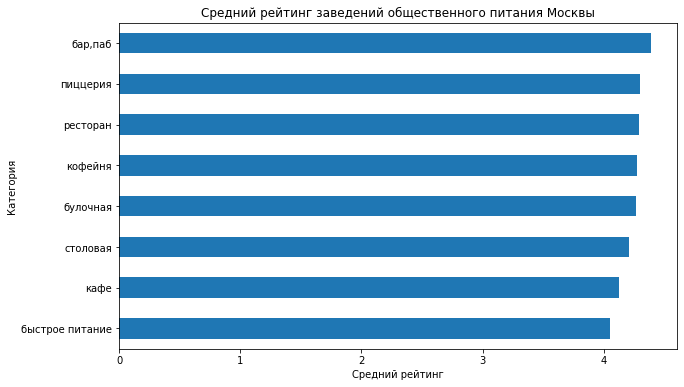

In [57]:
# Визуализируем полученные данные 
rating_mean.plot(kind='barh', figsize=(10, 6))
plt.ylabel('Категория')
plt.xlabel('Средний рейтинг')
plt.title('Средний рейтинг заведений общественного питания Москвы');

В целом рейтинг заведений не сильно отличнается в зависимости от категории заведения: минимальное значение рейтинга - 4,05 для заведений быстрого питания; 4,39 - максимальное значение рейтинга для баров, пабов.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [58]:
cols = ['rating', 'category', 'district', 'seats', 'chain', 'price', 'is_24_7']
df_subset = new_df[cols]

# Вычисляем матрицу корреляции phi_k
corr_matrix = df_subset.phik_matrix(interval_cols=['rating', 'seats'])

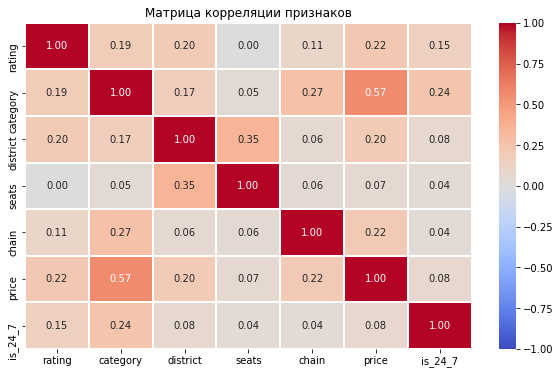

In [59]:
# Построим матрицу корреляций
cols = ['rating', 'category', 'district', 'seats', 'chain', 'price', 'is_24_7']
df_subset = new_df[cols]

# Вычисляем матрицу корреляции phi_k
corr_matrix = df_subset.phik_matrix(interval_cols=['rating', 'seats'])


# Визулизируем матрицу
plt.figure(figsize=(10, 6))
sns.heatmap(data = corr_matrix,
           annot = True,
           vmin = -1,
           vmax = 1,
           fmt = '.2f',
           linewidths = 1,
           cmap = 'coolwarm')
plt.title('Матрица корреляции признаков');

Наиболее высокие значения коэффициентов корреляции наблюдаются среди следующих пар признаков:  
категория - ценовой сегмент (0.57)  
административный округ - количество посадочных мест (0.35)  
категория - сетевое/несетевое заведение (0.27)  
категория - режим работы заведения (0.24)  
рейтинг - ценовой сегмент (0.22)  
рейтинг - административный округ (0.20)  
Остальные коэффициенты корреляции соответствуют значениям < 0.2, что может говорить об очень слабой связи между признаками. Наибольшее количество высоких коэффициентов корреляции соответствует признакам категория, рейтинг, административный округ, данные признаки следует рассмотреть более детально.

In [60]:
# Построим матрицу корреляций для признака rating
cols = ['rating', 'category', 'district', 'seats', 'chain', 'price', 'is_24_7']
df_subset = new_df[cols]

# Вычисляем матрицу корреляции phi_k
corr_matrix = df_subset.phik_matrix(interval_cols=['rating', 'seats'])

rating_corr = corr_matrix[['rating']].drop('rating').sort_values(by = 'rating', ascending = False)
display(rating_corr)

,rating
price,0.220295
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


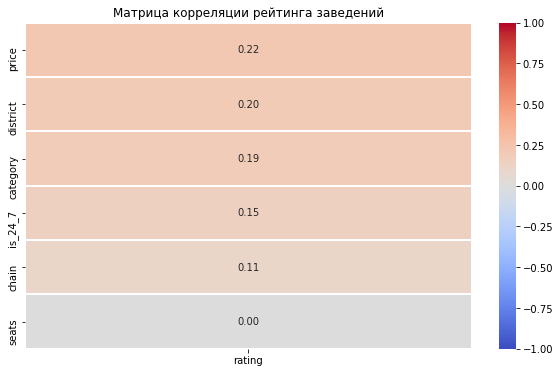

In [61]:
# Визулизируем матрицу
plt.figure(figsize=(10, 6))
sns.heatmap(data = rating_corr,
           annot = True,
           vmin = -1,
           vmax = 1,
           fmt = '.2f',
           linewidths = 1,
           cmap = 'coolwarm')
plt.title('Матрица корреляции рейтинга заведений');

Наиболее сильная связь признака rating отмечается с признаками административного округа (district, коэффициент 0,2) и ценовой категории (price, коэффициент 0,22). Остальные признаки имеют слабую связь с признаком rating (коэффициент < 0,2) Также важно отметить, что с признаком количества посадочных мест заведения (seats) связь полностью отсутствует (коэффициент 0). Возможно, такой результат может быть связан с недостаточным количеством данных о посадочных местах

In [62]:
# Проверим связь rating с признаком district
# Расчитаем средний рейтинг заведений по административным округам
grouped_dist = new_df.groupby('district')['rating'].mean().sort_values()
display(grouped_dist)

district
Юго-Восточный административный округ       4.101120
Северо-Восточный административный округ    4.147978
Юго-Западный административный округ        4.172920
Восточный административный округ           4.174185
Западный административный округ            4.181647
Южный административный округ               4.184417
Северо-Западный административный округ     4.208802
Северный административный округ            4.240980
Центральный административный округ         4.377520
Name: rating, dtype: float64

In [63]:
# Расчитаем средний рейтинг заведений по всему датафрейму
mean_rating = round(new_df['rating'].mean(), 2)
display(mean_rating)

4.23

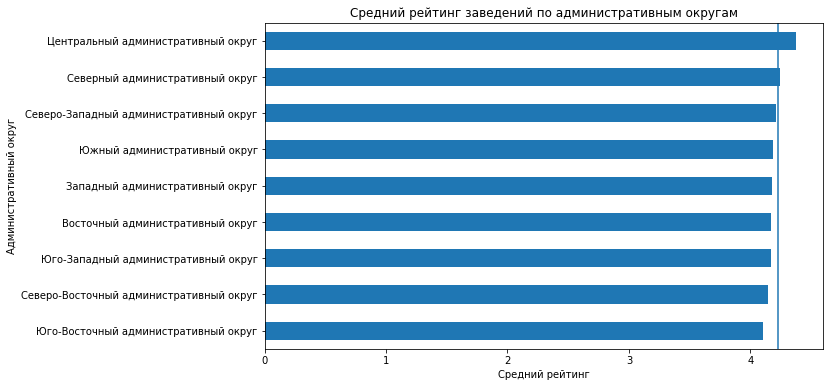

In [64]:
# Построим диаграмму распределения среднего рейтинга в зависимости от административного центра
plt.figure(figsize=(10, 6))
mean_rating_dist = grouped_dist.plot(kind='barh')
plt.ylabel('Административный округ')
plt.xlabel('Средний рейтинг')
plt.title('Средний рейтинг заведений по административным округам')
plt.axvline(mean_rating);


Согласно полученной диаграмме, средний рейтинг заведения незначительно изменяется в зависимости от административного округа (диапазон изменений от 4.1 до 4.38). ***Наиболее высокий средний рейтинг фиксируется в Центральном административном округе (4.38)***, средний рейтинг заведений в этом административном округе выше среднего рейтинга заведений во всем датасете. Также для ***Северного административного округа (4.24)*** средний рейтинг заведений находится на уровне среднего рейтинга заведений во всем датасете. Для остальных административных округов фиксируется рейтинг ниже среднего по всем заведениям. ***Наиболее низкий - в Юго-Восточном административном округе (4.1)***. Учитывая малый разброс показателей рейтинга, можно сделать вывод о том, что административный округ может быть связан с рейтингом заведения напрямую или опосредованно (через третью переменную), однако связь не является сильной.

In [65]:
# Проверим связь rating с признаком price
# Расчитаем средний рейтинг заведений по ценовым категориям
grouped_price = new_df.groupby('price')['rating'].mean().sort_values()
display(grouped_price)

price
низкие           4.173077
средние          4.297874
выше среднего    4.386348
высокие          4.436611
Name: rating, dtype: float64

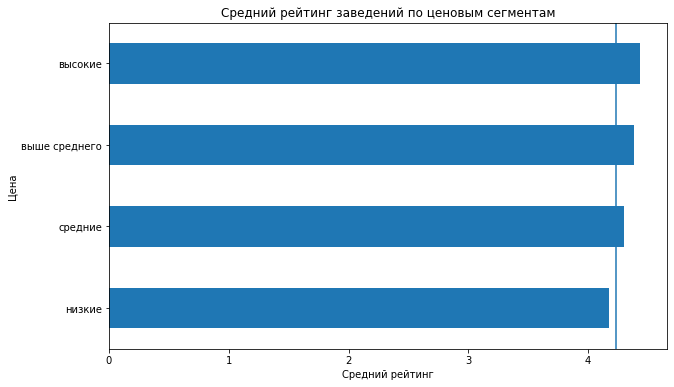

In [66]:
# Построим диаграмму распределения среднего рейтинга в зависимости от ценового сегмента заведения 
plt.figure(figsize=(10, 6))
mean_rating_price = grouped_price.plot(kind='barh')
plt.ylabel('Цена')
plt.xlabel('Средний рейтинг')
plt.title('Средний рейтинг заведений по ценовым сегментам')
plt.axvline(mean_rating);

Согласно полученным результатам, возможно отметить связь среднего рейтинга заведений с распределением заведений по ценовым сегментам: чем выше ценовой сегмент, тем выше рейтинг заведения. ***Наиболее высокий средний рейтинг имеют заведения, ценовая категория которых соответствует высокой (4.44)***. Также средний рейтинг выше среднего по всему датасету имеют заведения, соответствующие ценовой категории "выше среднего" и "средние" (4.39 и 4.3 соответственно). ***Самый низкий средний рейтинг фиксируется у заведений ценовой категории "низкие" (4.17)***. Таким образом, следует отметить наличие связи между рейтингом и ценовым сегментом заведения. 

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [69]:
# Выведем топ-15 популярных сетей в Москве
top_15 = new_df[new_df['chain'] == 1].groupby(['name', 'category']).agg({'id':'count', 
                                                           'rating':'mean'}).sort_values('id', ascending=False).head(15)
top_15_reset = top_15.reset_index()
display(top_15_reset)

,name,category,id,rating
0,шоколадница,кофейня,119,4.178151
1,домино'с_пицца,пиццерия,76,4.169737
2,додо_пицца,пиццерия,74,4.286486
3,one_price_coffee,кофейня,71,4.064789
4,яндекс_лавка,ресторан,69,3.872464
5,cofix,кофейня,65,4.075385
6,prime,ресторан,49,4.114286
7,кофепорт,кофейня,42,4.147619
8,кулинарная_лавка_братьев_караваевых,кафе,39,4.394872
9,теремок,ресторан,36,4.105556


<Figure size 720x432 with 0 Axes>

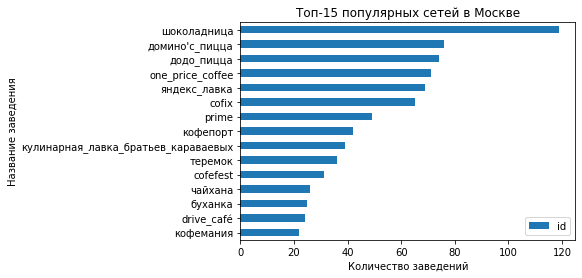

In [70]:
# Визуализируем полученные данные
top_15_sort = top_15_reset.sort_values('id', ascending=True)
plt.figure(figsize=(10, 6))
top_15_sort.plot(kind='barh', x = 'name', y='id')
plt.ylabel('Название заведения')
plt.xlabel('Количество заведений')
plt.title('Топ-15 популярных сетей в Москве')
plt.show()

<Figure size 720x432 with 0 Axes>

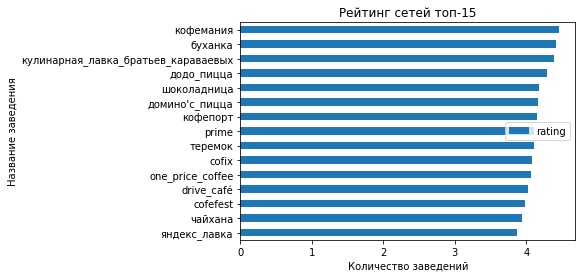

In [71]:
# Изучим рейтинги заведений
top_15_sorted = top_15_reset.sort_values('rating', ascending=True)
plt.figure(figsize=(10, 6))
top_15_sorted.plot(kind='barh', x = 'name', y='rating')
plt.ylabel('Название заведения')
plt.xlabel('Количество заведений')
plt.title('Рейтинг сетей топ-15')
plt.show()

In [72]:
# Сгруппируем топ-15 сетевых заведений по категориям
top_15_category = top_15.groupby('category')['id'].sum()
display(top_15_category)

category
булочная     25
кафе         89
кофейня     350
пиццерия    150
ресторан    154
Name: id, dtype: int64

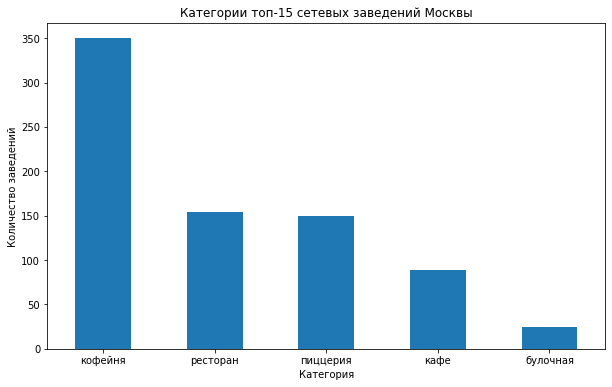

In [73]:
# Визуализируем полученные данные
plt.figure(figsize=(10, 6))
bx = top_15_category.sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.title('Категории топ-15 сетевых заведений Москвы')
bx.set_xticklabels(bx.get_xticklabels(), rotation=0);

В число топ-15 сетей Москвы по количеству заведений вошли следующие сетевые заведения:  
шоколадница  
домино'с_пицца  
додо_пицца  
one_price_coffee  
яндекс_лавка  
cofix  
prime  
кофепорт  
кулинарная_лавка_братьев_караваевых  
теремок  
cofefest  
чайхана  
буханка  
drive_café  
кофемания  
Среди списка топ-15 сетевых заведений Москвы наиболее популярной категорией является ***кофейня*** - в данной категории представлено больше всего заведений (330). Практически в половину меньшее количество заведений представлено в категориях ***ресторан*** (157) и ***пиццерия*** (150)

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [74]:
# Изучим данные в столбце middle_avg_bill
new_df['middle_avg_bill'].describe()

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

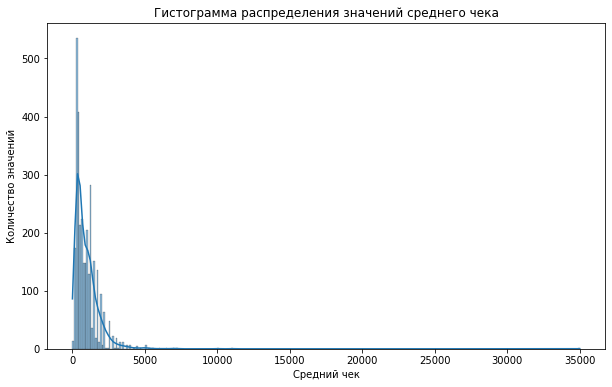

In [75]:
# Построим гистограмму
plt.figure(figsize=(10, 6))
sns.histplot(data=new_df, x='middle_avg_bill', kde=True)
plt.ylabel('Количество значений')
plt.xlabel('Средний чек')
plt.title('Гистограмма распределения значений среднего чека');

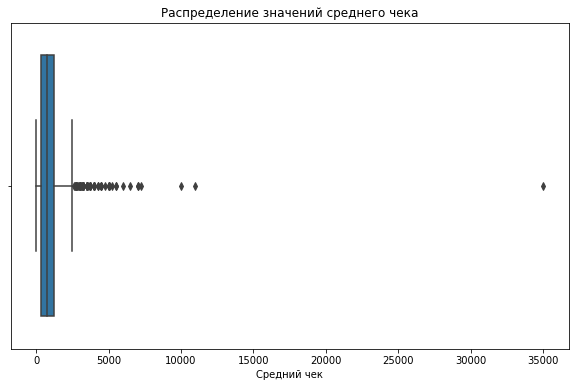

In [76]:
# Построим "ящик с усами"
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_df, x='middle_avg_bill')
plt.xlabel('Средний чек')
plt.title('Распределение значений среднего чека');

Графики позволяют сделать вывод о том, что среди значений среднего чека присутствуют экстремально высокие значения (выбросы).

In [77]:
# Изучим распределение среднего чека заведения в зависимости от района Москвы
middle_avg_bill_grouped = new_df.groupby('district').agg(avg_bill=('middle_avg_bill', 'mean'), median_bill=('middle_avg_bill', 'median')).sort_values('avg_bill')
display(middle_avg_bill_grouped)

,avg_bill,median_bill
district,,
Юго-Восточный административный округ,654.097938,450.0
Северо-Восточный административный округ,716.611296,500.0
Юго-Западный административный округ,792.561702,600.0
Восточный административный округ,820.626923,575.0
Северо-Западный административный округ,822.222930,700.0
Южный административный округ,834.398089,500.0
Северный административный округ,927.959627,650.0
Западный административный округ,1053.225490,1000.0
Центральный административный округ,1191.057547,1000.0


Среднее значение и медиана по среднему чеку отличаются: среднее значение выше медианы. Также, согласно описательной статистике, максимальное значение среднего чека равно 35000, что подтверждает неравномерное распределение данных и наличие выбросов.

In [78]:
# Разделим полученные данные на 3 категории в зависимости от медианы среднего чека (чтобы исключить возможное влияние выбросов)
middle_avg_bill_grouped['avg_bill_category'] = pd.cut(middle_avg_bill_grouped['median_bill'], bins = 3, labels = ['низкий средний чек', 'средний средний чек', 'высокий средний чек'])
display(middle_avg_bill_grouped)

,avg_bill,median_bill,avg_bill_category
district,,,
Юго-Восточный административный округ,654.097938,450.0,низкий средний чек
Северо-Восточный административный округ,716.611296,500.0,низкий средний чек
Юго-Западный административный округ,792.561702,600.0,низкий средний чек
Восточный административный округ,820.626923,575.0,низкий средний чек
Северо-Западный административный округ,822.222930,700.0,средний средний чек
Южный административный округ,834.398089,500.0,низкий средний чек
Северный административный округ,927.959627,650.0,средний средний чек
Западный административный округ,1053.225490,1000.0,высокий средний чек
Центральный административный округ,1191.057547,1000.0,высокий средний чек


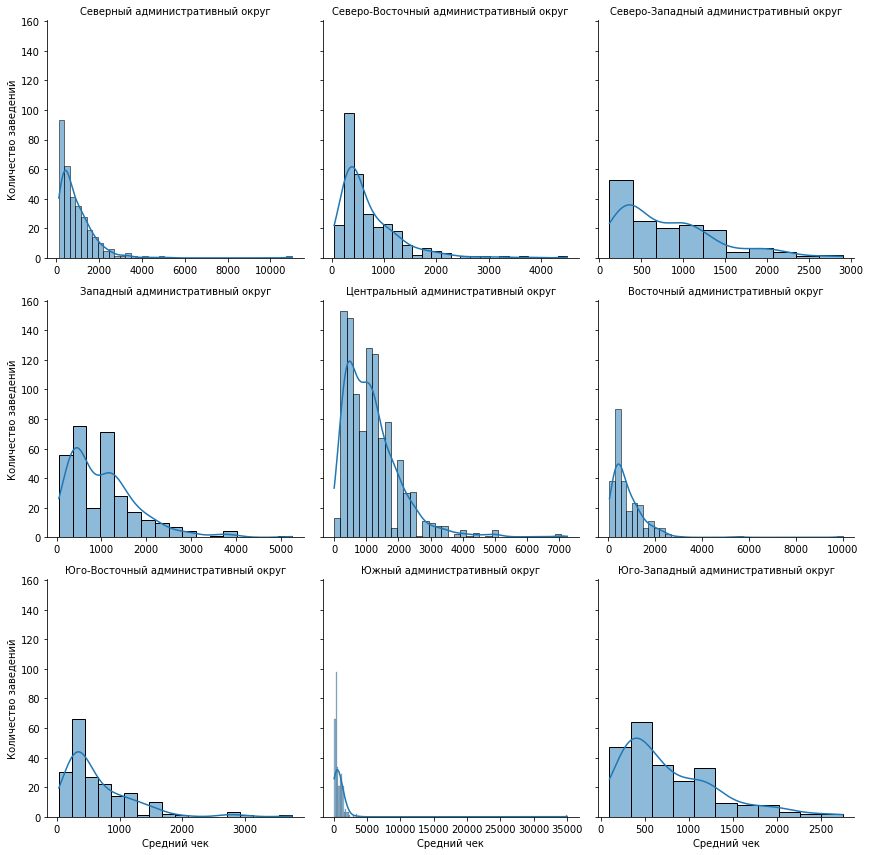

In [79]:
# Визуализируем распределение данных о среднем чеке заведения в зависимости от района Москвы
# Создадим сетку графиков
bill_facetgrid = sns.FacetGrid(
    data = new_df,
    col ='district',
    col_wrap=3,
    height=4,
    sharex=False
)
#Добавим инфо для графиков в сетки
bill_facetgrid.map(sns.histplot, 'middle_avg_bill', kde=True)

# Добавим заголовки графиков
bill_facetgrid.set_titles("{col_name}")
bill_facetgrid.set_axis_labels("Средний чек", "Количество заведений")
plt.show()


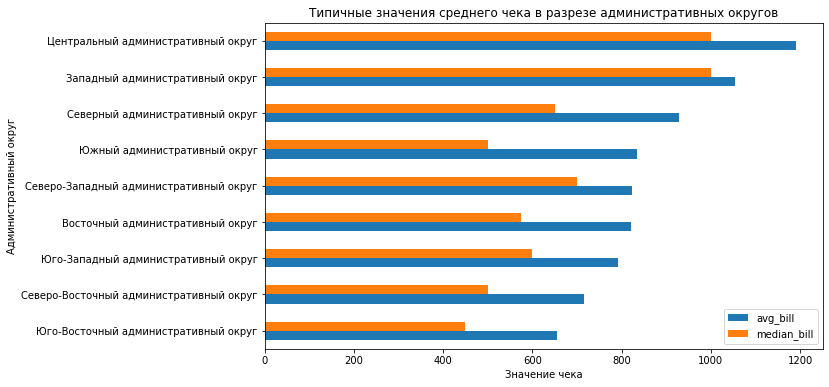

In [80]:
# Построим график распределения среднего чека и медианы заведений в разрезе административных округов
middle_avg_bill_grouped.plot(kind = 'barh', figsize=(10, 6))
plt.ylabel('Административный округ')
plt.xlabel('Значение чека')
plt.title('Типичные значения среднего чека в разрезе административных округов');

Согласно полученным данным, ***наиболее высокий средний чек*** наблюдается ***в Западном и Центральном административном округе*** (значения среднего чека равны 1053.22 и 1191.1 соответственно). В категорию заведений ***со средним размером среднего чека*** вошли ***Северо-Западный и Северный административные округа*** (834.4 и 928 соответственно). В категорию заведений ***с низким средним чеком*** вошли ***заведения в Юго-Восточном, Северо-Восточном, Юго-Западном, Восточном, Южном административных округах.***  Такое распределение может быть связано, во-первых, с высокой концентрацией заведений соответствующей ценовой категории, а также заведений с высоким рейтингом в обозначенных районах, во-вторых, с уровнем престижности районов.

В ряде округов фиксируются неестественно высокие значения, выбивающиеся из общего распределения данных, предположительно, являющиеся выбросами: в Южном административном округе максимальное значение среднего чека равно 35000, в Восточном и Северном административных округах максимальные значения средних чеков около 10000. Появление таких высоких значений может быть связано, в первую очередь, с техническими ошибками ввода данных. Кроме того, медианные значения средних чеков во всех административных округах ниже средних показателей, что подтверждает неравномерное распределение данных и наличие выбросов. 

В целом анализ данных показывает, что наиболее высокие средний чеки территориально встречаются в центре, на севере, западе и северо-западе Москвы.

---

### Промежуточный вывод


Проведенный исследовательский анализ данных позволяет сделать следующие выводы:  
1. В датасете представлены следующие категории данных: булочная, столовая, быстрое питание, пиццерия, бар,паб, кофейня, ресторан, кафе. Наиболее представленными категориями являются кафе (2377), ресторан (2042), кофейня (1413); наименее представленными - столовая (315), булочная (256)  
2. Лидером по количеству заведений являются Центральный - 2242 заведения, примерно в 2,5 раза больше количества заведений в следующем по количеству заведений административном округе. Наиболее популярными категориями заведений в Центральном административном округе являются ***рестораны*** *(670)*, ***кафе*** *(464)* и ***кофейни*** *(428)*. Наименее популярными также являются заведения категорий ***столовая*** *(66)*, ***булочная*** *(50)*.  
3. Несетевых заведений представлено практически в 2 раза больше, чем сетевых (5200 несетевых, 3203 сетевых). ***Кофейня, пиццерия, булочная*** - категории, которые в большинстве представлены сетевыми заведениями. Среди несетевых заведений в большинстве представлены ***столовые, рестораны, кафе, заведения быстрого питания, бары,пабы***. 
4. Минимальное количество посадочных мест равно 0, что может быть реальным значением для заведений без посадочных мест, работающих в формате "навынос" (кофейня, булочная). Медианное количество посадочных мест равно 75. Количество посадочных мест варьируется в зависимости от категории заведения: ***наибольшее количество посадочных мест в заведениях бар, паб, ресторан, наименьшее количество посадочных мест представлено в заведениях пиццерия, кафе, булочная***.
5. Рейтинги заведений по категориям варьируются в диапазоне от 4,05 до 4,39. ***Минимальное значение среднего рейтинга у заведений категории быстрого питания. Максимальное значение среднего рейтинга характерно для баров, пабов.***  
6. ***Наиболее высокий средний рейтинг фиксируется в Центральном (4.38) и Северном административных округах (4.24)***. Для остальных административных округов фиксируется рейтинг ниже среднего по всем заведениям. Наиболее низкий - в Юго-Восточном административном округе (4.1). Средний рейтинг заведений также связан с распределением заведений по ценовым сегментам: чем выше ценовой сегмент, тем выше рейтинг заведения. ***Наиболее высокий средний рейтинг имеют заведения, ценовая категория которых соответствует "высокой" (4.44), "выше среднего"(4.39) и "средней" (4.3). Самый низкий средний рейтинг фиксируется у заведений ценовой категории "низкие" (4.17).***  
7. ***Среди списка топ-15 сетевых заведений Москвы наиболее популярной категорией является кофейня*** - в данной категории представлено больше всего заведений (330).  
8. Наиболее высокие средний чеки территориально встречаются в заведениях районах центра, севера, запада и северо-запада Москвы, наиболее низкие значения среднего чека характерны для заведений южных, восточных, юго-восточных районов.


## 4. Итоговый вывод и рекомендации


### Общий обзор проделанной работы

В работу были взяты 2 датасета: rest_info (8406 строк, 9 столбцов), rest_price (4058 строк, 5 столбцов). Датасеты были объединены в один для удобства дальнейшей обработки (new_df). В столбце price был изменен тип данных. В столбцах hours, avg_bill пропуски были заменены на категории-индикаторы. В датасете были обнаружены и удалены неявные дубли. Также был добавлен новый столбец is_24_7, позволяющий выделить заведения, работающие круглосуточно и ежедневно. Итоговый датасет new_df включает 8402 строки и 14 столбцов.  
После предобработки был проведен исследовательский анализ данных, включающий статистический и корреляционный анализ данных с созданием соответствующих визулизаций.   

### Ответы на исследовательские вопросы. Главные выводы

По итогам проведенного исследовательского анализа данных представляется возможным отметить следующие результаты:  
1. **Наибольшее количество заведений представлено в категориях**:  
- кафе (2377), 
- ресторан (2042), 
- кофейня (1413);  

**наименее представленными являются категории**: 
- столовая (315), 
- булочная (256)  

2. **Лидером по количеству заведений является Центральный административный округ** - 2242 заведения, примерно в 2,5 раза больше количества заведений в следующем по количеству заведений административном округе. **Наиболее популярными категориями заведений в Центральном административном округе являются:**  
- рестораны (670),  
- кафе (464),  
- кофейни (428).  

**Наименее популярными являются заведения категорий:**
- столовая (66),  
- булочная (50).  

Вероятнее всего, это связано с тем, что в Центральном административном округе представлены заведения наиболее высокого ценового сегмента. Следующими по количеству заведений после Центрального административного округа явлюятся Северный (899 заведений) и Южный (892 заведения) административные округа. Наименьшее количество заведений представлено в Юго-Восточном (714 заведений), Юго-западном (709 заведений) и Северо-Западном (409 заведений) административных округах.  


3. **Несетевых заведений представлено практически в 2 раза больше, чем сетевых** (5200 несетевых, 3203 сетевых, что в процентном выражении составляет 62% и 38% соответственно). Кофейня, пиццерия, булочная - категории, которые в большинстве представлены сетевыми заведениями. Важно отметить, что разница в количестве сетевых и несетевых заведений по данным категориям небольшая и составляет от 3% до 22%. Среди несетевых заведений в большинстве представлены столовые, рестораны, кафе, заведения быстрого питания, бары,пабы. Для данных категорий характерно значительное преобладание несетевых заведений: количество несетевых заведений превосходит количество сетевых на 24%-56%. Количество сетевых заведений в округе также превышает количество несетевых. Это может говорить о том, что **в целом для заведений общепита Москвы наиболее распространен несетевой формат**. При этом максимальное количество сетевых и несетевых заведений отмечается в Центральном административном округе (875 и 1367 соответственно), тогда как наибольшая концентрация сетевых заведений относительно несетевых наблюдается в Западном, Юго-Западном административных округах. Наибольшая концентрация несетевых заведений относительно сетевых наблюдается в Юго-Восточном, Южном, Восточном административных округах.


4. Минимальное количество посадочных мест равно 0, что может быть реальным значением для заведений без посадочных мест, работающих в формате "навынос". Медианное количество посадочных мест равно 75. Количество посадочных мест варьируется в зависимости от категории заведения: **наибольшее количество посадочных мест в заведениях бар, паб, ресторан, наименьшее количество посадочных мест представлено в заведениях пиццерия, кафе, булочная**, что может объясняться форматом работы данных заведений (часто в формате "навынос"). Максимальное количество посадоных мест равно 1288, что может яявляться реальным значением для фуд-кортов. 


5. Рейтинги заведений по категориям варьируются в диапазоне от 4,05 до 4,39. **Минимальное значение среднего рейтинга у заведений категории быстрого питания. Максимальное значение среднего рейтинга характерно для баров, пабов. Наиболее высокий средний рейтинг фиксируется в Центральном (4.38) и Северном административных округах (4.24).** Для остальных административных округов фиксируется рейтинг ниже среднего по всем заведениям. **Наиболее низкий - в Юго-Восточном административном округе (4.1).** Средний рейтинг заведений также связан с распределением заведений по ценовым сегментам: чем выше ценовой сегмент, тем выше рейтинг заведения. **Наиболее высокий средний рейтинг имеют заведения, ценовая категория которых соответствует "высокой" (4.44), "выше среднего"(4.39) и "средней" (4.3). Самый низкий средний рейтинг фиксируется у заведений ценовой категории "низкие" (4.17).**  


6. В ходе исследования был составлен список топ-15 сетевых заведений Москвы:  
шоколадница  
домино'с_пицца  
додо_пицца  
one_price_coffee  
яндекс_лавка  
cofix  
prime  
кофепорт  
кулинарная_лавка_братьев_караваевых  
теремок  
cofefest  
чайхана  
буханка  
drive_café  
кофемания  
**Среди списка топ-15 сетевых заведений Москвы наиболее популярной категорией является кофейня** - в данной категории представлено больше всего заведений (330).  


7. В целом наиболее высокие средний чеки территориально встречаются в заведениях районах центра, севера, запада и северо-запада Москвы, наиболее низкие значения среднего чека характерны для заведений южных, восточных, юго-восточных районов. Такое распределение может быть связано, во-первых, с высокой концентрацией заведений соответствующей ценовой категории, а также заведений с высоким рейтингом в обозначенных районах, во-вторых, с уровнем престижности районов. 


### Рекомендации на основе анализа данных

Резюмируя полученные результаты, можно выделить некоторые характеристики наиболее популярных моделей заведений общественного питания Москвы:
1. Несетевое заведение с высоким средним чеком в Центральном, Северном или Западном административном округе. Заведение в Центральном административном округе может соответствовать категории ресторан, бар, паб с наличием посадочных мест.  
2. Сетевое заведение в Центральном или Западном административном округе категории кофейня (сети Шоколадница, one_price_coffee, cofix) с наличием или без наличия посадочных мест (в формате "навынос").  

Такие заведения имеют наиболее высокие рейтинги, однако, учитывая популярность обозначенных моделей, при реализации подобных  проектов следует учитывать высокий уровень конкуренции среди аналогичных заведений в обозначенных административных округах.  

Перспективным направлением является реализация проектов в Северо-Западном, Западном и Северном административных округах: в данных административных округах количество заведений меньше, при этом данный округ относится к районам с наиболее высокими средними чеками в Москве, а также средний рейтинг заведений округа находится на 3 месте среди всех округов Москвы и составляет 4.2. Рекомендуется провести более детальное исследование.  
Также рекомендуется обратить более детальное внимание на сетевые заведения: количество сетевых заведений уступает количеству несетевых заведений во всех рассмотренных округах.